In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# Context

**Problem**: predict the forest cover type (the predominant kind of tree cover) from cartographic variables.        
**Dataset**: train.csv from https://www.kaggle.com/competitions/forest-cover-type-prediction

The dataset provides following information:  

**Elevation** - Elevation in meters  
**Aspect** - Aspect in degrees azimuth   
**Slope** - Slope in degrees  
**Horizontal_Distance_To_Hydrology** - Horz Dist to nearest surface water features    
**Vertical_Distance_To_Hydrology** - Vert Dist to nearest surface water features  
**Horizontal_Distance_To_Roadways** - Horz Dist to nearest roadway  
**Hillshade_9am (0 to 255 index)** - Hillshade index at 9am, summer solstice  
**Hillshade_Noon (0 to 255 index)** - Hillshade index at noon, summer solstice  
**Hillshade_3pm (0 to 255 index)** - Hillshade index at 3pm, summer solstice  
**Horizontal_Distance_To_Fire_Points** - Horz Dist to nearest wildfire ignition points  
**Wilderness_Area** (**4 binary columns**, 0 = absence or 1 = presence) - Wilderness area designation   
**Soil_Type** (**40 binary columns**, 0 = absence or 1 = presence) - Soil Type designation  
**Cover_Type** (7 types, integers 1 to 7) - Forest Cover Type designation, **target** variable  

The wilderness areas are:

1 - Rawah Wilderness Area  
2 - Neota Wilderness Area  
3 - Comanche Peak Wilderness Area  
4 - Cache la Poudre Wilderness Area  

The soil types are:

1 Cathedral family - Rock outcrop complex, extremely stony.  
2 Vanet - Ratake families complex, very stony.  
3 Haploborolis - Rock outcrop complex, rubbly.  
4 Ratake family - Rock outcrop complex, rubbly.  
5 Vanet family - Rock outcrop complex complex, rubbly.  
6 Vanet - Wetmore families - Rock outcrop complex, stony.  
7 Gothic family.  
8 Supervisor - Limber families complex.  
9 Troutville family, very stony.  
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.  
11 Bullwark - Catamount families - Rock land complex, rubbly.  
12 Legault family - Rock land complex, stony.  
13 Catamount family - Rock land - Bullwark family complex, rubbly.  
14 Pachic Argiborolis - Aquolis complex.  
15 unspecified in the USFS Soil and ELU Survey.  
16 Cryaquolis - Cryoborolis complex.   
17 Gateview family - Cryaquolis complex.  
18 Rogert family, very stony.  
19 Typic Cryaquolis - Borohemists complex.  
20 Typic Cryaquepts - Typic Cryaquolls complex.  
21 Typic Cryaquolls - Leighcan family, till substratum complex.  
22 Leighcan family, till substratum, extremely bouldery.  
23 Leighcan family, till substratum - Typic Cryaquolls complex.  
24 Leighcan family, extremely stony.  
25 Leighcan family, warm, extremely stony.  
26 Granile - Catamount families complex, very stony.  
27 Leighcan family, warm - Rock outcrop complex, extremely stony.  
28 Leighcan family - Rock outcrop complex, extremely stony.  
29 Como - Legault families complex, extremely stony.  
30 Como family - Rock land - Legault family complex, extremely stony.  
31 Leighcan - Catamount families complex, extremely stony.  
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.  
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.  
34 Cryorthents - Rock land complex, extremely stony.  
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.  
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.  
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.  
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.  
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.  
40 Moran family - Cryorthents - Rock land complex, extremely stony.  

# Data quality assessment

In [81]:
data = pd.read_csv("../data/train.csv", index_col="Id")
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [82]:
data.shape

(15120, 55)

**Number of observations**: 15120    
**Number of variables**: 55 (out of which one (**Cover_Type**) is target variable)

## Missing data

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

Total number of missing values:

In [84]:
print(f'Missing cells: {data.isna().sum().sum()}')
print(f'Missing cells(%): {round((data.isna().sum().sum() / (data.shape[0] * data.shape[1])) * 100, 2)}%')

Missing cells: 0
Missing cells(%): 0.0%


## Duplicate rows

In [85]:
data.duplicated().sum()

0

## Variable types

In [86]:
data.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

All variables are numeric, but Wilderness_Area and Soil_Type are binary columns which represent categories, we will explore them separately:

In [87]:
num_cols = data.columns[:10].tolist()
print(f'Number of numeric variables: {len(num_cols)}')
print(num_cols)

Number of numeric variables: 10
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


Let's apply reverse-one-hot-encoding to **Wilderness_Area** and **Soil_Type**:

In [88]:
data["Wilderness_Area"] = data.loc[:, 'Wilderness_Area1':'Wilderness_Area4'].idxmax(axis=1)
data["Soil_Type"] = data.loc[:, 'Soil_Type1':'Soil_Type40'].idxmax(axis=1)

In [89]:
cat_cols = data.columns[-3:].tolist()
print(f'Number of categorical variables: {len(cat_cols)}')
print(cat_cols)

Number of categorical variables: 3
['Cover_Type', 'Wilderness_Area', 'Soil_Type']


### Numeric variables

In [90]:
data[num_cols].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [91]:
# for col in num_cols:
#     print(col)
#     print(f'Distinct: {len(data[col].value_counts())}')
#     print(f'Distinct(%): {round((len(data[col].value_counts()) / data.shape[0]) * 100, 2)}%')
#     print(f'Minimum: {data[col].min()}')
#     print(f'Maximum: {data[col].max()}')
#     print(f'Mean: {round(data[col].mean())}')
#     print(f'Median: {round(data[col].median())}')
#     IQR = data[col].describe()['75%'] - data[col].describe()['25%']
#     print(f'Interquartile range: {IQR}\n')

Mean and median values for **Horizontal_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points** significantly differ from max values. Probably there are a lot of outliers.  
We will explore these variables in more details in next section.

### Categorical/Binary variables
Count distinct, assess unique values:

In [92]:
data[cat_cols].astype('object').describe()

,Cover_Type,Wilderness_Area,Soil_Type
count,15120,15120,15120
unique,7,4,38
top,5,Wilderness_Area3,Soil_Type10
freq,2160,6349,2142


In [93]:
for col in cat_cols:
    print(col)
    display(pd.DataFrame({
    'count': data[col].value_counts(),
    'frequency(%)': (data[col].value_counts() / data.shape[0]) * 100
    }))

Cover_Type


,count,frequency(%)
5,2160,14.285714
2,2160,14.285714
1,2160,14.285714
7,2160,14.285714
3,2160,14.285714
6,2160,14.285714
4,2160,14.285714


Wilderness_Area


,count,frequency(%)
Wilderness_Area3,6349,41.990741
Wilderness_Area4,4675,30.919312
Wilderness_Area1,3597,23.789683
Wilderness_Area2,499,3.300265


Soil_Type


,count,frequency(%)
Soil_Type10,2142,14.166667
Soil_Type29,1291,8.538360
Soil_Type3,962,6.362434
Soil_Type4,843,5.575397
Soil_Type23,757,5.006614
Soil_Type38,728,4.814815
Soil_Type30,725,4.794974
Soil_Type32,690,4.563492
Soil_Type39,657,4.345238
Soil_Type6,650,4.298942


# Data exploration

## 1. Exploring each individual variable

### 1.1 Numerical variables

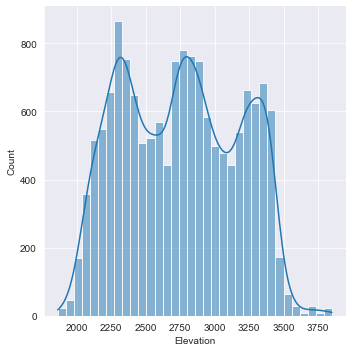

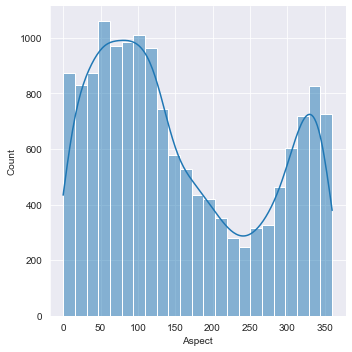

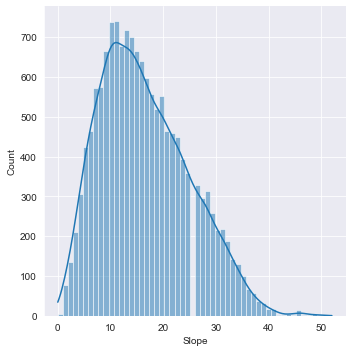

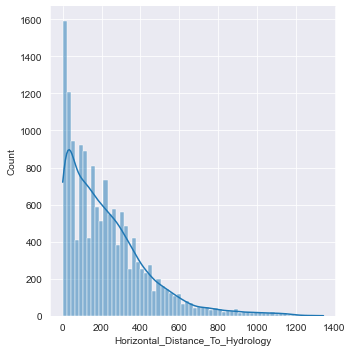

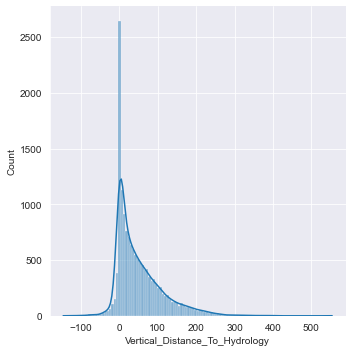

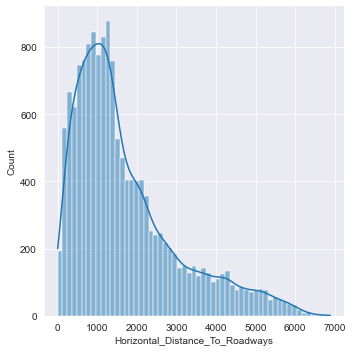

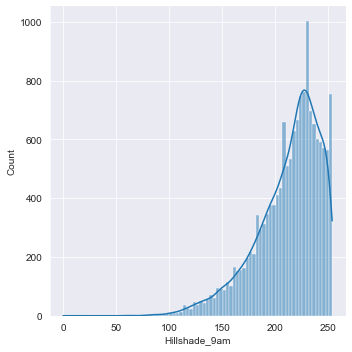

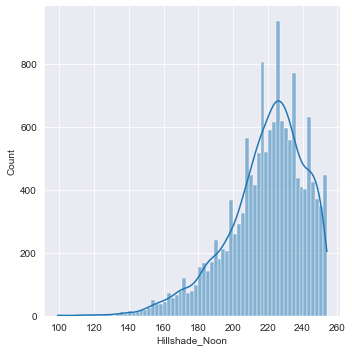

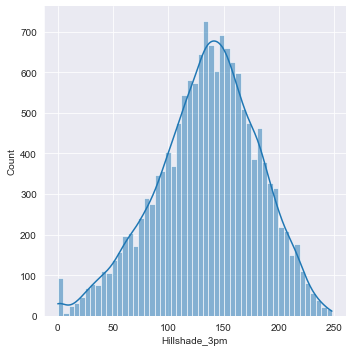

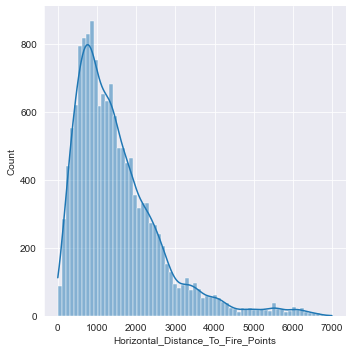

In [94]:
for col in num_cols:
    sns.displot(data=data, x=col, kde=True)

We can try to divide **Elevation** into 3 bins.  
**Slope**, **Horizontal_Distance_To_Hydrology**, **Vertical_Distance_To_Hydrology**, **Horizontal_Distance_To_Roadways**, **Horizontal_Distance_To_Fire_Points** are skewed right.  
**Hilshade_9am**, **Hillshade_Noon** are skewed left.

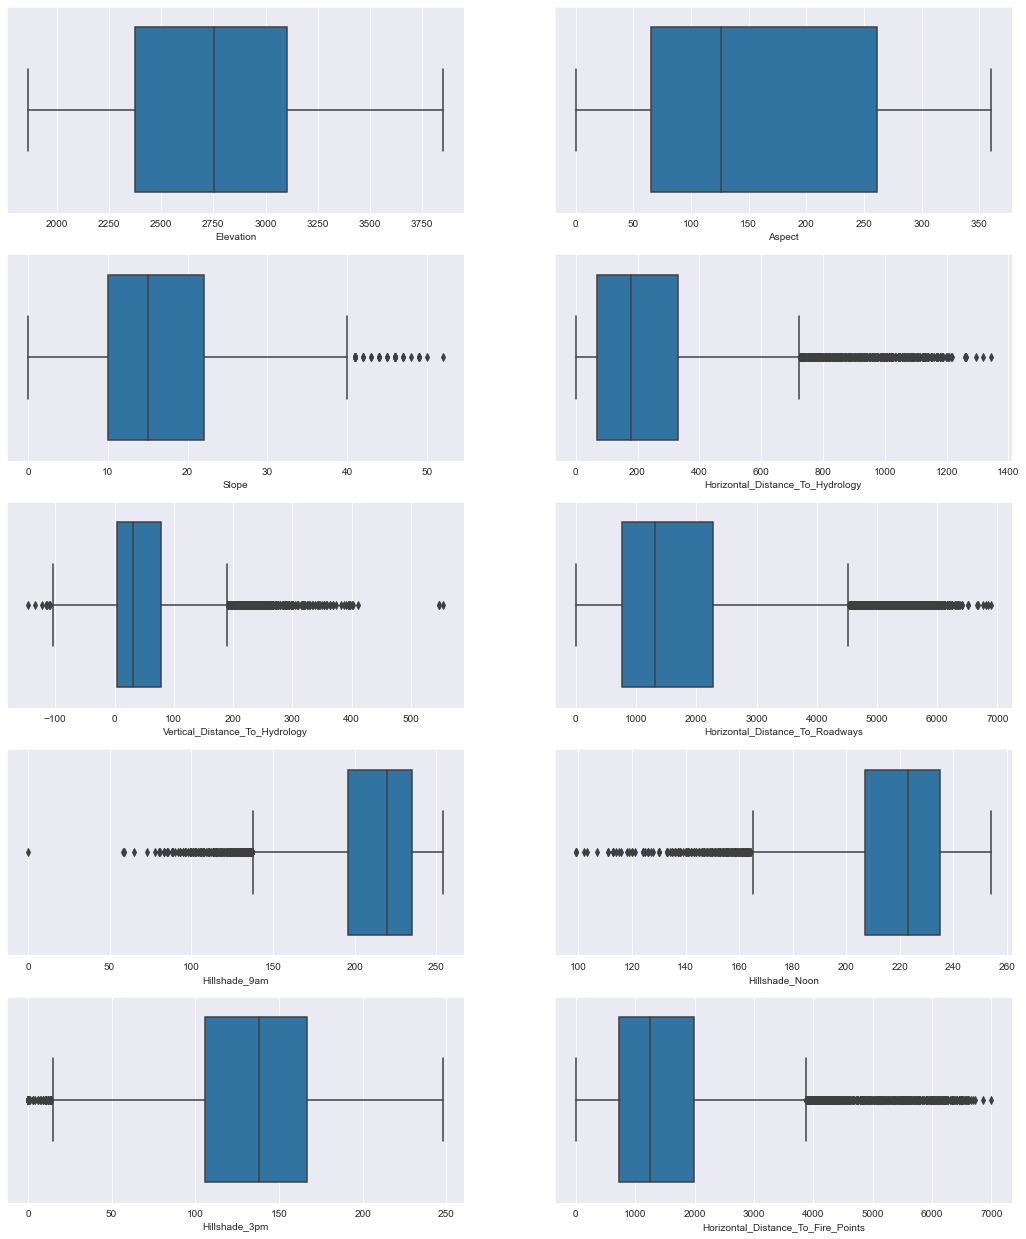

In [95]:
_, axes = plt.subplots(5, 2, figsize=(18,22))
for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=data, ax=axes[int(i / 2), i % 2])

We can drop outliers or log-transform them.

In [96]:
# c = data.copy()
# for col in num_cols:
#     IQR = c[col].describe()['75%'] - c[col].describe()['25%'] # interquartile range
#     outliers = c[(c[col] < c[col].describe()['75%'] - 1.5 * IQR) | (c[col] > c[col].describe()['75%'] + 1.5 * IQR)].index
#     c = c.drop(index=outliers)

In [97]:

# _, axes = plt.subplots(5, 2, figsize=(18,22))
# for i, col in enumerate(num_cols):
#     sns.boxplot(x=col, data=c, ax=axes[int(i / 2), i % 2])

### 1.2 Categorical variables

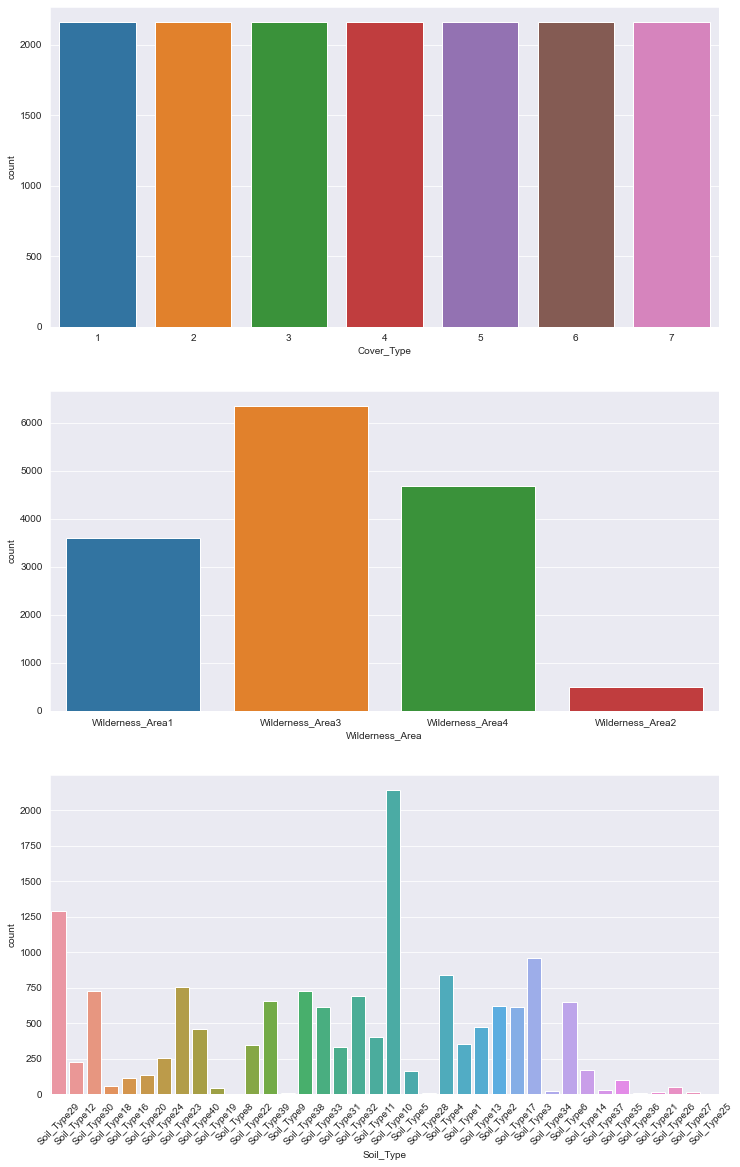

In [98]:
_, axes = plt.subplots(3, 1, figsize=(12,20))
for i, col in enumerate(cat_cols):
    sns.countplot(data=data, x=col, ax=axes[i])
    plt.xticks(rotation=45)

We can reduce number of Soil_Type categories grouping some of them by frequency or description.

## 2. Exploring the relationship between each variable and the target

Our target variable **Cover_Type** is categorical. We will explore **continuous x categorical** and **categorical x categorical** relationships.

### 2.1 Continuous x Categorical

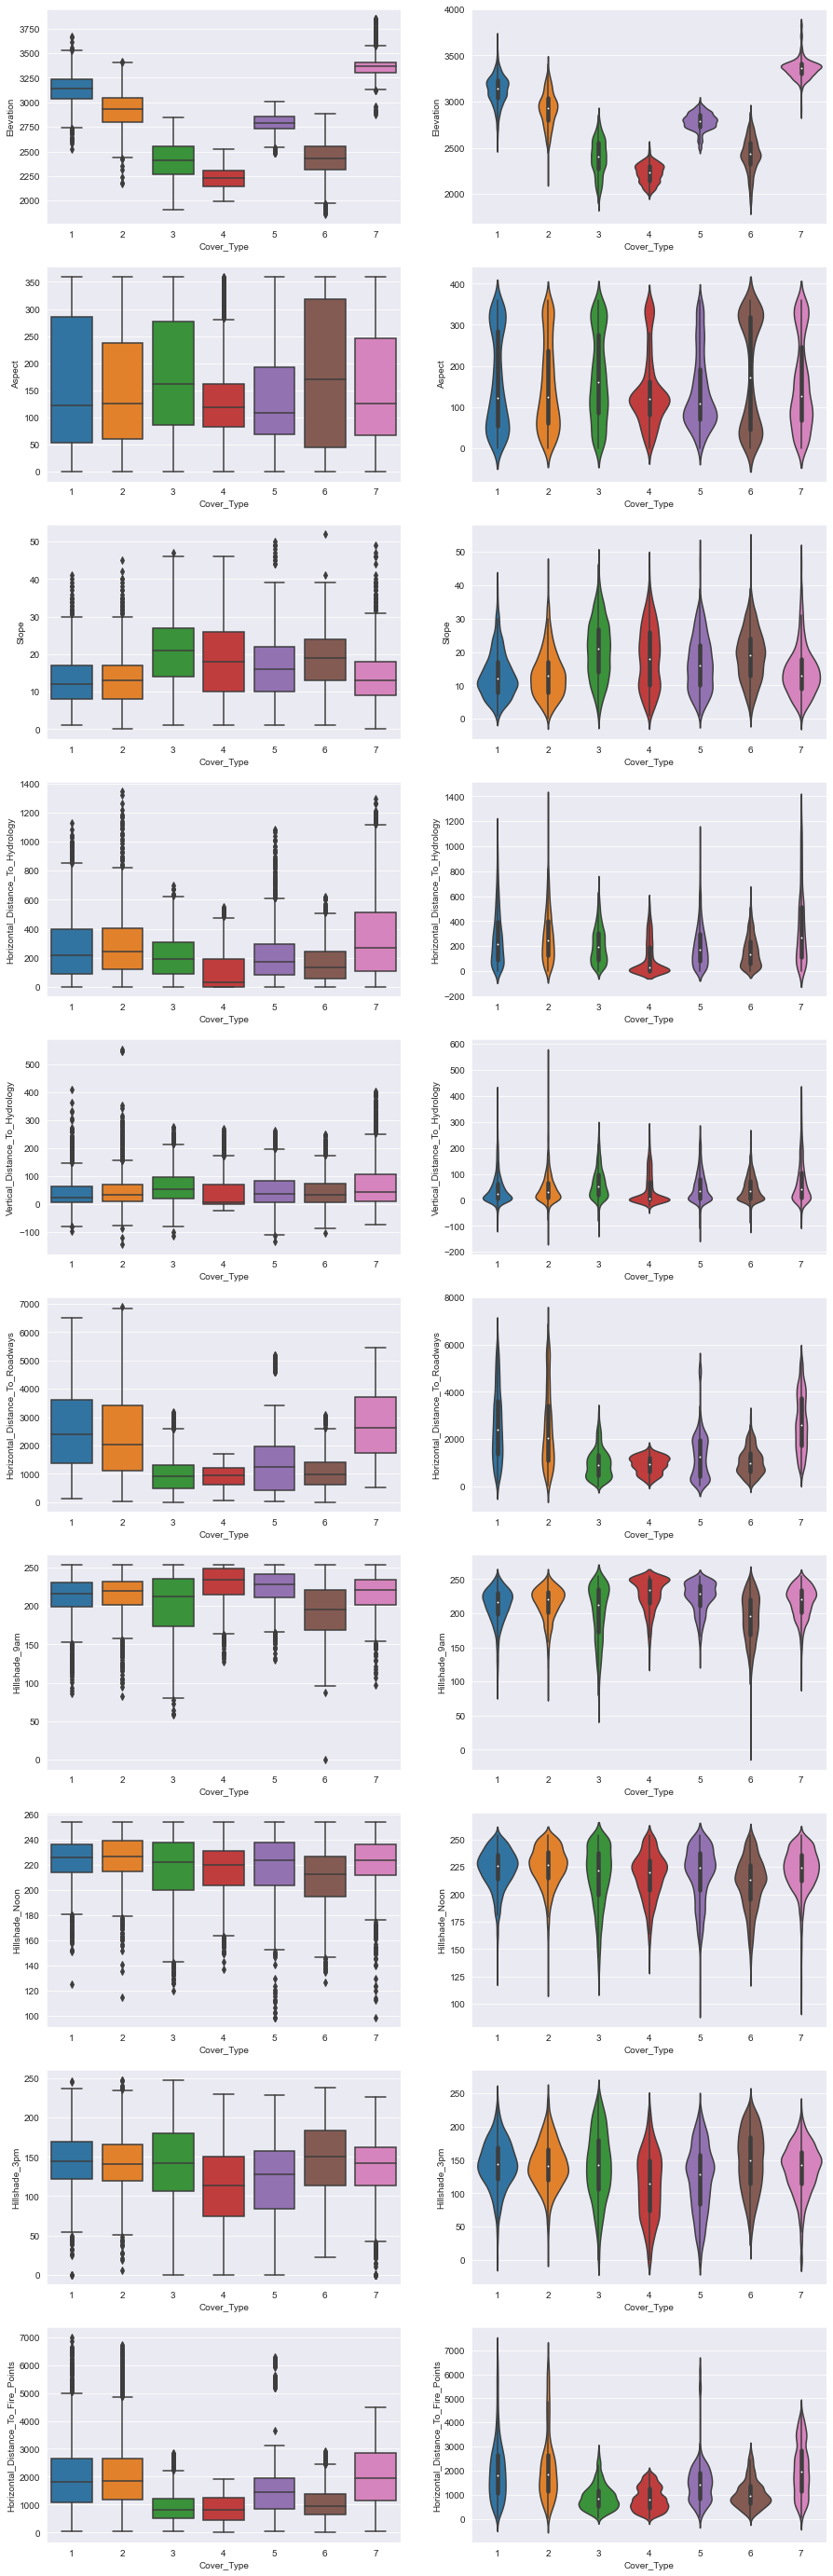

In [99]:
_, axes = plt.subplots(10, 2, figsize=(15, 50))
for i, col in enumerate(num_cols):
    sns.boxplot(data=data, x="Cover_Type", y=col, ax=axes[i, 0])
    sns.violinplot(data=data, x="Cover_Type", y=col, ax=axes[i, 1])

Elevation looks like a good predictor of cover type.

### 2.2 Categorical x Categorical

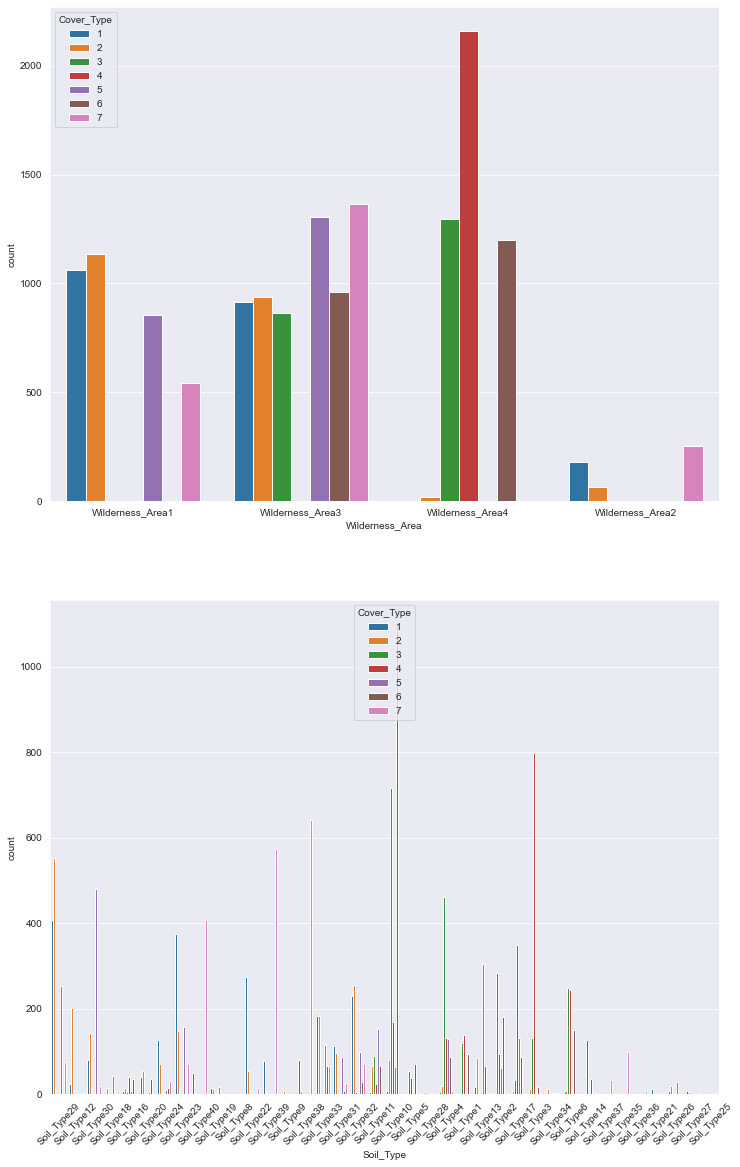

In [100]:
_, axes = plt.subplots(2, 1, figsize=(12,20))
for i, col in enumerate(["Wilderness_Area", "Soil_Type"]):
    sns.countplot(data=data, x=col, hue="Cover_Type", ax=axes[i])
    plt.xticks(rotation=45)

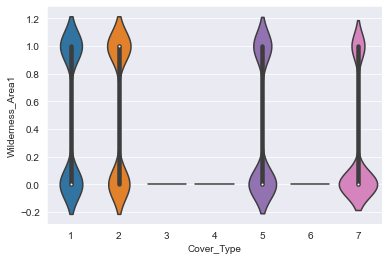

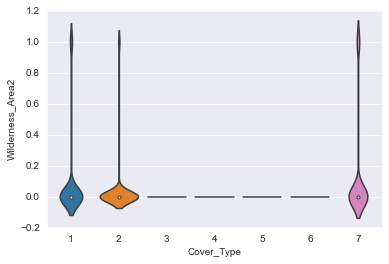

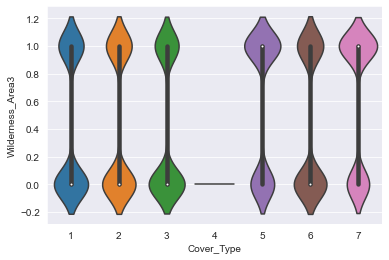

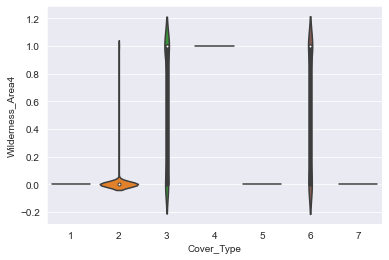

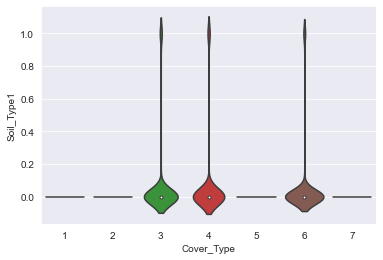

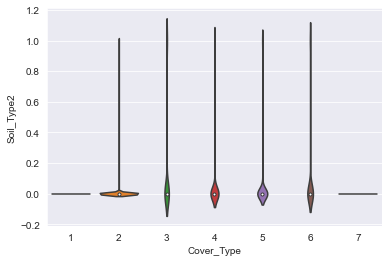

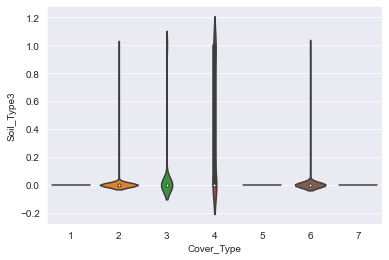

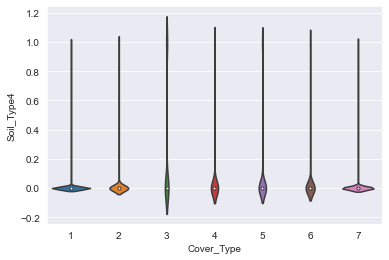

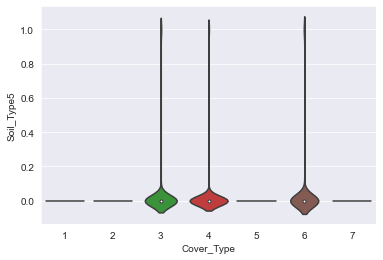

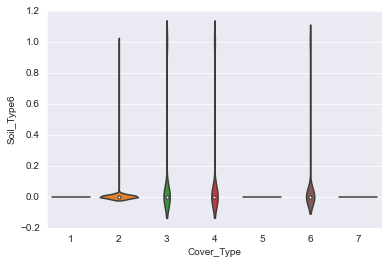

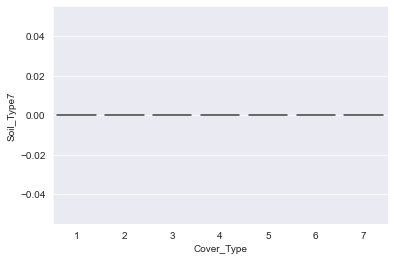

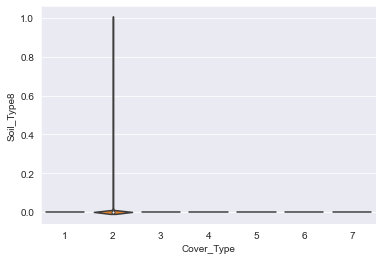

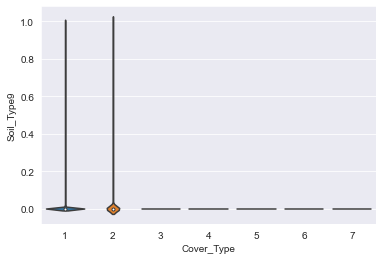

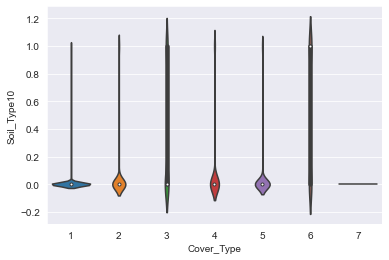

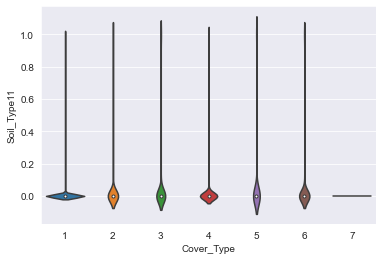

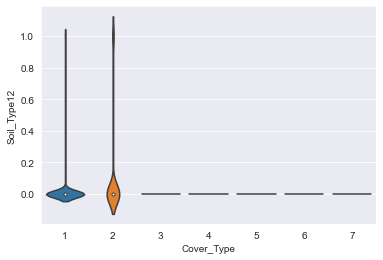

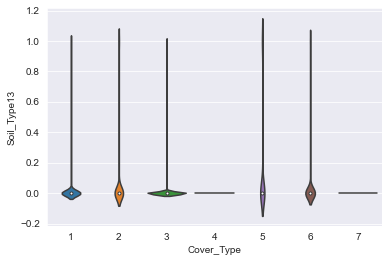

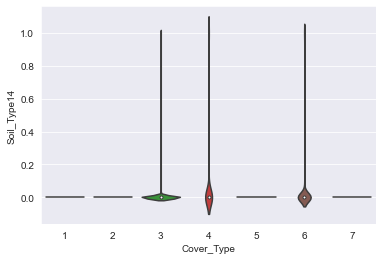

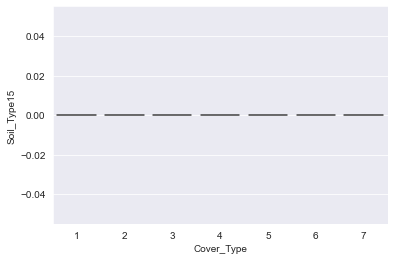

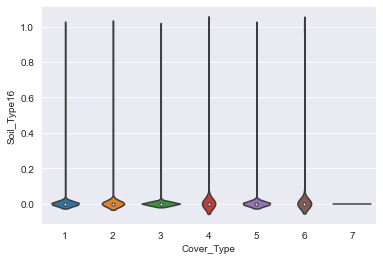

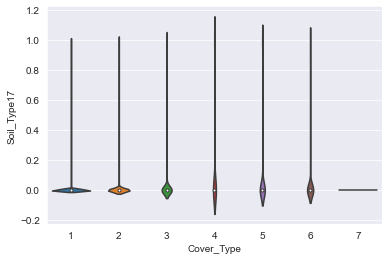

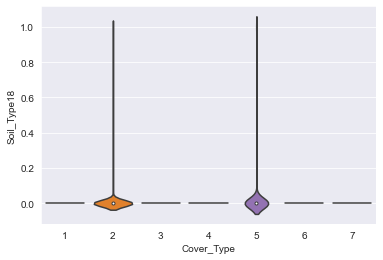

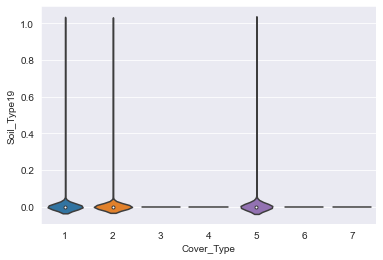

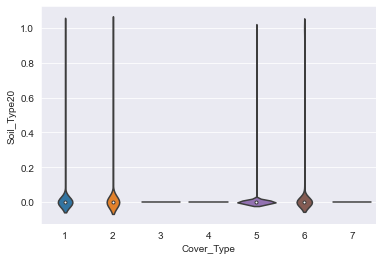

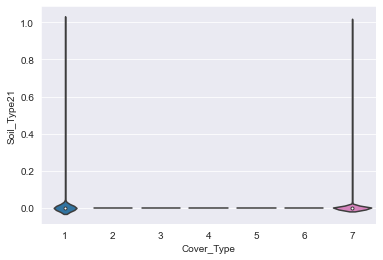

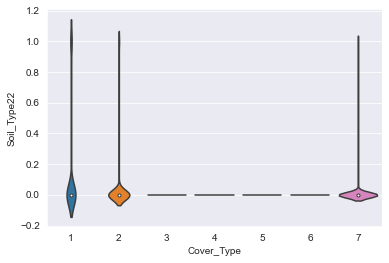

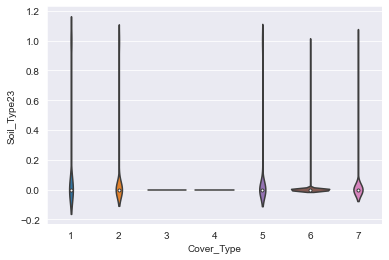

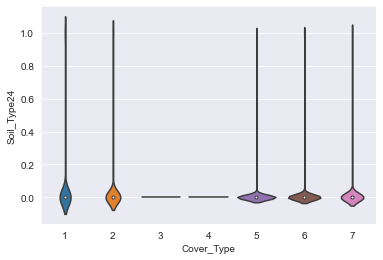

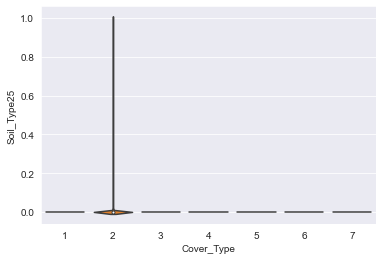

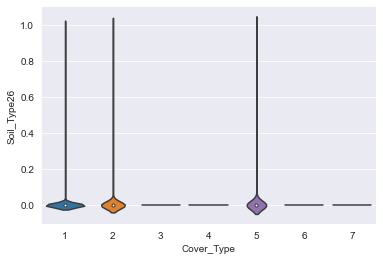

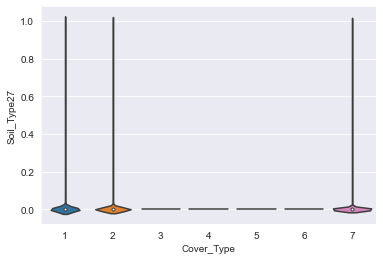

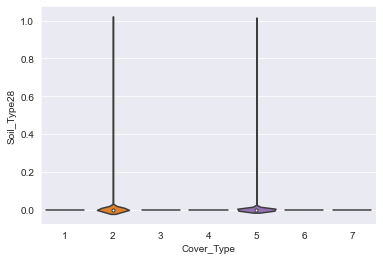

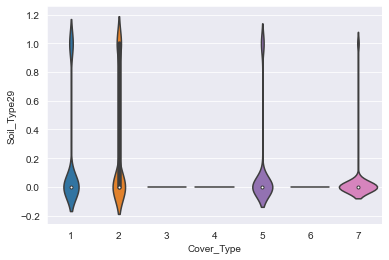

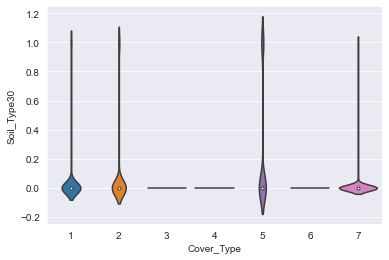

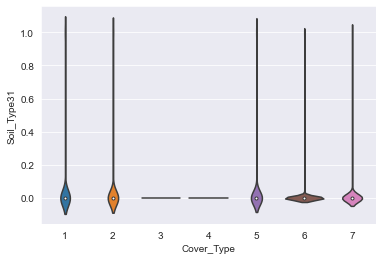

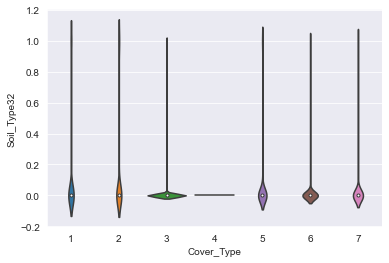

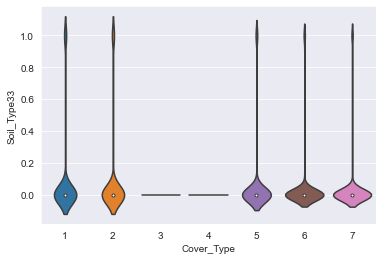

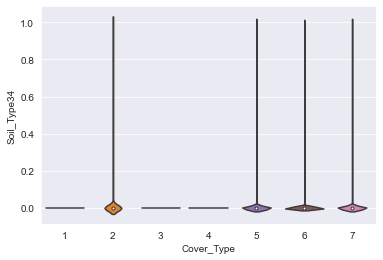

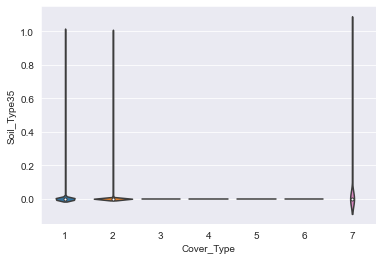

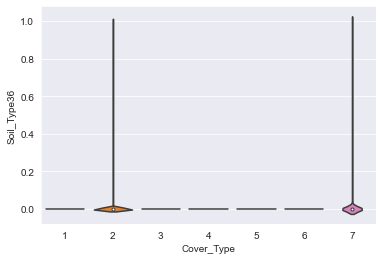

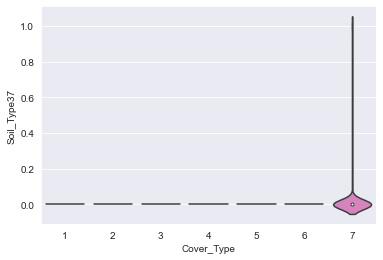

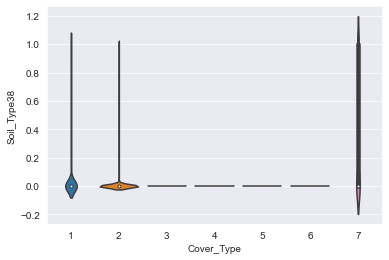

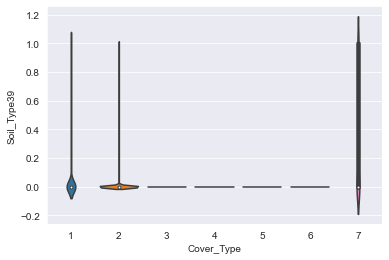

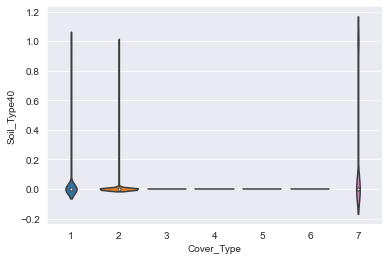

In [106]:
for col in data.columns[10:-3]:
    sns.violinplot(data=data, x="Cover_Type", y=col)
    plt.show()

Wilderness_Area3 gives no class distinction.  
Soil_Types 1, 5, 8, 9, 12, 14, 18-22, 25-30 and 35-40 give visible class distinction.

## 3. Assessing interactions between variables

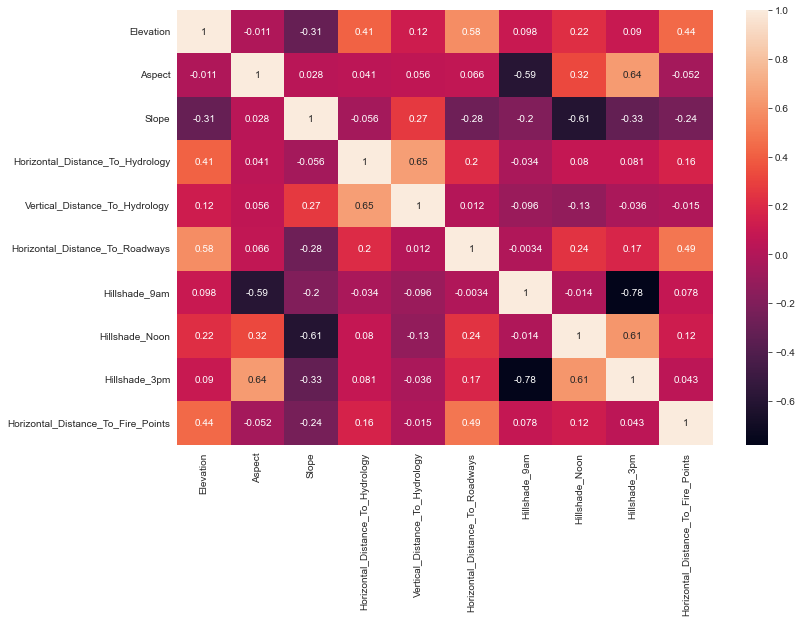

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(data.iloc[:,:10].corr(), annot=True)
plt.show()

We see that following pairs of features have strong correlation:  
Aspect - Hillshade_3pm  
Slope - Hillshade_Noon  
Horizontal_Distance_To_Hydrology - Vertical_Distance_To_Hydrology  
Hillshade_3pm — Hillshade_9am  
Hillshade_Noon — Hillshade_3pm  
 
We can try to drop or combine some of them.